<a href="https://colab.research.google.com/github/ushifali/Twiter_Analysis_Abortion_Law_US/blob/main/EDA%20of%20unsupervised%20abortion%20tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#Here im utilizing data i got from VICINITY which is unsupervised

In [7]:
#has user data
csv1 = pd.read_csv("/content/final.csv",engine='python')

#has tweet data
csv2 =  pd.read_csv("/content/Final Datasetfinal.csv",engine='python')

merged_data = csv1.merge(csv2,on=["Screen Name"])

merged_data.to_csv('final_unsupervised.csv')

FileNotFoundError: ignored

In [ ]:
#train_data = pd.read_csv("/content/final_unsupervised.csv",low_memory=False)
merged_data.to_csv('final_unsupervised.csv')
train_data = merged_data
train_data.head()

In [ ]:
len(train_data)

In [ ]:
train_data.columns

In [ ]:
train_data.drop(['Unnamed: 0_x', 'User Id', 'Default Profile', 'Unnamed: 0_y', 'Unnamed: 0.1', 'Tweet Id', 'Media Type', 'Media URLs', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18','Name_y', 'UTC_y', 'Created At_y', 'Favorites_y','Name_x', 'Verified', 'Language', 'Lists', 'Followers', 'Following','Favorites_x', 'Tweets', 'URL', 'Retweets',
        'Tweet Type', 'URLs', 'Hashtags', 'Mentions', 'Created At_x'], axis=1, inplace=True)

In [ ]:
train_data.columns

In [ ]:
train_data.shape

In [ ]:
train_data.drop_duplicates(subset='Text', inplace=True)

In [ ]:
#so we deleted duplicates dunno how it got created n the first place btw
train_data.columns

In [ ]:
train_data.shape

In [ ]:
train_data.to_csv('final_unsupervised.csv')
train_data = pd.read_csv("/content/final_unsupervised.csv",low_memory=False)

In [ ]:
pd.set_option('max_colwidth', 800)
train_data['Text'].head()

In [ ]:
#now to combine with another data obtained from SNSCRAPE has 50k tweets

In [ ]:
train_data2 = pd.read_csv("/content/Data_from_snscraper",low_memory=False)
train_data2.head()

In [ ]:
train_data.columns

In [ ]:

train_data.rename(columns = {'Screen Name':'username', 'UTC_x':'date','Bio':'bio','Text':'tweet','Location':'location','Client':'source'}, inplace = True)

In [ ]:
print(train_data.columns)
print(train_data2.columns)

In [ ]:
merged=train_data.append(train_data2)
print(merged)

In [ ]:
merged.shape

In [ ]:
merged.drop_duplicates(subset='tweet', inplace=True)
merged.shape

In [ ]:
merged.to_csv("Data_from_snscraper_and_vicinity.csv")

In [2]:
train_data = pd.read_csv("/content/Data_from_snscraper_and_vicinity.csv",low_memory=False)
train_data.rename(columns = {'bio':'Bio','tweet':'Text'}, inplace = True)

In [4]:
#STEP 2
#Remove Punctions ans stopwords
%pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

print(stopwords.words('english'))


stop_words = set(stopwords.words('english'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# import string library function for punctuation
import string 

# import Regular Expression 
import re 

#function to clean text removing stopwords
def clean_text(text):
    text = re.sub(r"https:(\/\/t\.co\/([A-Za-z0-9]|[A-Za-z]){10})", '', text)
    text = ' '.join( [word for word in text.split() if len(word)>1] )
    text = str(text).lower()    
    text = re.sub(r"https:(\/\/t\.co\/([A-Za-z0-9]|[A-Za-z]){10})", '', text)
    pat = r"[{}]".format(string.punctuation) 
    text = re.sub(pat, '', text) 
    text = re.sub('  +', '', text)     
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub('@\.', '', text)    
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('nan', '', text)  
    
    # remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    #remove single characters
    text = ' '.join([word for word in text.split() if len(word) > 1] )
    text = re.sub('\s*\\b([a-z]|[a-z]{2})\\b', '', text)
    #to remove single secial characters
    text = re.sub('\?|\.|\!|\/|\;|\:|\'|\+|\-|\*|\"', '', text)
    text = re.sub('’|“|”', '', text)
    return text
#ALSO IN THIS FUNCTION IM PRETTY SURE MANY ARE REPEATED. NOT GONNA CHCEK WHICH IS OBSELETE

In [6]:
print(train_data['Text'].values[0])
print('-'*100)
print(clean_text(train_data['Text'].values[0]))


train_data['clean'] = train_data['Text'].apply(lambda row: clean_text(row))
train_data['clean_bio'] = train_data['Bio'].apply(lambda row: clean_text(str(row)))
train_data.head()

#cheater #Scandal #prochoice Knowledge is power site:Sexual #Revolution is bringing #sexodus https://t.co/ExEG6LwCvg https://t.co/Olw3RF5OPL
----------------------------------------------------------------------------------------------------
cheater scandal prochoice knowledge power sitesexual revolution bringing sexodus


,Unnamed: 0,Unnamed: 0.1,username,date,Bio,location,Text,source,clean,clean_bio
0,0,0,WomensPowerCen,2016-05-03T19:27:17.000Z,Via UTube https://t.co/FLl7KHSUKO book https:/...,NaN,#cheater #Scandal #prochoice Knowledge is powe...,"<a href=""https://www.tweetsuite.com/"" rel=""nof...",cheater scandal prochoice knowledge power site...,via utube book blog aid women follow get indm
1,1,2,WomensPowerCen,2016-05-03T19:27:17.000Z,Via UTube https://t.co/FLl7KHSUKO book https:/...,NaN,#cheater #Scandal #prochoice Knowledge is powe...,"<a href=""https://www.tweetsuite.com/"" rel=""nof...",cheater scandal prochoice knowledge power site...,via utube book blog aid women follow get indm
2,2,9,Abtreibpranger,2019-07-10T20:17:59.000Z,Schwangere anprangern ist für mich Tabu;Anpran...,München,RT @ewtnDE : Der Samstag auf dem Kongress Lebe...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",ewtnde der samstag auf dem kongress lebenwürd...,schwangere anprangern ist für mich tabuanprang...
3,3,10,Abtreibpranger,2019-07-10T20:17:59.000Z,Schwangere anprangern ist für mich Tabu;Anpran...,München,RT @ewtnDE : Heute Abend um 20.00 Uhr geht es ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",ewtnde heute abend uhr geht los wir übertrage...,schwangere anprangern ist für mich tabuanprang...
4,4,11,Abtreibpranger,2019-07-10T20:17:59.000Z,Schwangere anprangern ist für mich Tabu;Anpran...,München,"RT @sakrumverum : Wäre heute nicht Sonntag, wü...","<a href=""https://mobile.twitter.com"" rel=""nofo...",sakrumverum wäre heute nicht sonntag würden d...,schwangere anprangern ist für mich tabuanprang...


In [7]:
#STEP 3
#LEMMANTIZE IT
# Now we will tokenize our cleaned sentences and then tag each word with POS - tagging. It is necessary for lemmatization
# In corpus linguistics, part-of-speech tagging (POS tagging or PoS tagging or POST), also called grammatical tagging 
# is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech.

import nltk
nltk.download('punkt')

import nltk
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize

train_data['tokenized'] = train_data['clean'].apply(lambda row: word_tokenize(row))
train_data['pos_tags'] = train_data['tokenized'].apply(lambda row: nltk.tag.pos_tag(row))

train_data['tokenized_bio'] = train_data['clean_bio'].apply(lambda row: word_tokenize(row))
train_data['pos_tags_bio'] = train_data['tokenized_bio'].apply(lambda row: nltk.tag.pos_tag(row))
train_data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Unnamed: 0,Unnamed: 0.1,username,date,Bio,location,Text,source,clean,clean_bio,tokenized,pos_tags,tokenized_bio,pos_tags_bio
0,0,0,WomensPowerCen,2016-05-03T19:27:17.000Z,Via UTube https://t.co/FLl7KHSUKO book https:/...,NaN,#cheater #Scandal #prochoice Knowledge is powe...,"<a href=""https://www.tweetsuite.com/"" rel=""nof...",cheater scandal prochoice knowledge power site...,via utube book blog aid women follow get indm,"[cheater, scandal, prochoice, knowledge, power...","[(cheater, NN), (scandal, NN), (prochoice, NN)...","[via, utube, book, blog, aid, women, follow, g...","[(via, IN), (utube, JJ), (book, NN), (blog, NN..."
1,1,2,WomensPowerCen,2016-05-03T19:27:17.000Z,Via UTube https://t.co/FLl7KHSUKO book https:/...,NaN,#cheater #Scandal #prochoice Knowledge is powe...,"<a href=""https://www.tweetsuite.com/"" rel=""nof...",cheater scandal prochoice knowledge power site...,via utube book blog aid women follow get indm,"[cheater, scandal, prochoice, knowledge, power...","[(cheater, NN), (scandal, NN), (prochoice, NN)...","[via, utube, book, blog, aid, women, follow, g...","[(via, IN), (utube, JJ), (book, NN), (blog, NN..."
2,2,9,Abtreibpranger,2019-07-10T20:17:59.000Z,Schwangere anprangern ist für mich Tabu;Anpran...,München,RT @ewtnDE : Der Samstag auf dem Kongress Lebe...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",ewtnde der samstag auf dem kongress lebenwürd...,schwangere anprangern ist für mich tabuanprang...,"[ewtnde, der, samstag, auf, dem, kongress, leb...","[(ewtnde, JJ), (der, NN), (samstag, NN), (auf,...","[schwangere, anprangern, ist, für, mich, tabua...","[(schwangere, RB), (anprangern, JJ), (ist, NN)..."
3,3,10,Abtreibpranger,2019-07-10T20:17:59.000Z,Schwangere anprangern ist für mich Tabu;Anpran...,München,RT @ewtnDE : Heute Abend um 20.00 Uhr geht es ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",ewtnde heute abend uhr geht los wir übertrage...,schwangere anprangern ist für mich tabuanprang...,"[ewtnde, heute, abend, uhr, geht, los, wir, üb...","[(ewtnde, RB), (heute, JJ), (abend, VBP), (uhr...","[schwangere, anprangern, ist, für, mich, tabua...","[(schwangere, RB), (anprangern, JJ), (ist, NN)..."
4,4,11,Abtreibpranger,2019-07-10T20:17:59.000Z,Schwangere anprangern ist für mich Tabu;Anpran...,München,"RT @sakrumverum : Wäre heute nicht Sonntag, wü...","<a href=""https://mobile.twitter.com"" rel=""nofo...",sakrumverum wäre heute nicht sonntag würden d...,schwangere anprangern ist für mich tabuanprang...,"[sakrumverum, wäre, heute, nicht, sonntag, wür...","[(sakrumverum, NN), (wäre, WRB), (heute, NN), ...","[schwangere, anprangern, ist, für, mich, tabua...","[(schwangere, RB), (anprangern, JJ), (ist, NN)..."


In [8]:
#USING wordnet tags
#https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        morphy_tag = {'NN':'n', 'JJ':'a','VB':'v', 'RB':'r'}
        try:
          return morphy_tag[treebank_tag[:2]]
        except:
          return 'n' 

    
train_data['wordnet_pos'] = train_data['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) 
                                                               for (word, pos_tag) in x])

train_data['wordnet_pos_bio'] = train_data['pos_tags_bio'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) 
                                                               for (word, pos_tag) in x])
train_data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Unnamed: 0,Unnamed: 0.1,username,date,Bio,location,Text,source,clean,clean_bio,tokenized,pos_tags,tokenized_bio,pos_tags_bio,wordnet_pos,wordnet_pos_bio
0,0,0,WomensPowerCen,2016-05-03T19:27:17.000Z,Via UTube https://t.co/FLl7KHSUKO book https:/...,NaN,#cheater #Scandal #prochoice Knowledge is powe...,"<a href=""https://www.tweetsuite.com/"" rel=""nof...",cheater scandal prochoice knowledge power site...,via utube book blog aid women follow get indm,"[cheater, scandal, prochoice, knowledge, power...","[(cheater, NN), (scandal, NN), (prochoice, NN)...","[via, utube, book, blog, aid, women, follow, g...","[(via, IN), (utube, JJ), (book, NN), (blog, NN...","[(cheater, n), (scandal, n), (prochoice, n), (...","[(via, n), (utube, a), (book, n), (blog, n), (..."
1,1,2,WomensPowerCen,2016-05-03T19:27:17.000Z,Via UTube https://t.co/FLl7KHSUKO book https:/...,NaN,#cheater #Scandal #prochoice Knowledge is powe...,"<a href=""https://www.tweetsuite.com/"" rel=""nof...",cheater scandal prochoice knowledge power site...,via utube book blog aid women follow get indm,"[cheater, scandal, prochoice, knowledge, power...","[(cheater, NN), (scandal, NN), (prochoice, NN)...","[via, utube, book, blog, aid, women, follow, g...","[(via, IN), (utube, JJ), (book, NN), (blog, NN...","[(cheater, n), (scandal, n), (prochoice, n), (...","[(via, n), (utube, a), (book, n), (blog, n), (..."
2,2,9,Abtreibpranger,2019-07-10T20:17:59.000Z,Schwangere anprangern ist für mich Tabu;Anpran...,München,RT @ewtnDE : Der Samstag auf dem Kongress Lebe...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",ewtnde der samstag auf dem kongress lebenwürd...,schwangere anprangern ist für mich tabuanprang...,"[ewtnde, der, samstag, auf, dem, kongress, leb...","[(ewtnde, JJ), (der, NN), (samstag, NN), (auf,...","[schwangere, anprangern, ist, für, mich, tabua...","[(schwangere, RB), (anprangern, JJ), (ist, NN)...","[(ewtnde, a), (der, n), (samstag, n), (auf, n)...","[(schwangere, r), (anprangern, a), (ist, n), (..."
3,3,10,Abtreibpranger,2019-07-10T20:17:59.000Z,Schwangere anprangern ist für mich Tabu;Anpran...,München,RT @ewtnDE : Heute Abend um 20.00 Uhr geht es ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",ewtnde heute abend uhr geht los wir übertrage...,schwangere anprangern ist für mich tabuanprang...,"[ewtnde, heute, abend, uhr, geht, los, wir, üb...","[(ewtnde, RB), (heute, JJ), (abend, VBP), (uhr...","[schwangere, anprangern, ist, für, mich, tabua...","[(schwangere, RB), (anprangern, JJ), (ist, NN)...","[(ewtnde, r), (heute, a), (abend, v), (uhr, a)...","[(schwangere, r), (anprangern, a), (ist, n), (..."
4,4,11,Abtreibpranger,2019-07-10T20:17:59.000Z,Schwangere anprangern ist für mich Tabu;Anpran...,München,"RT @sakrumverum : Wäre heute nicht Sonntag, wü...","<a href=""https://mobile.twitter.com"" rel=""nofo...",sakrumverum wäre heute nicht sonntag würden d...,schwangere anprangern ist für mich tabuanprang...,"[sakrumverum, wäre, heute, nicht, sonntag, wür...","[(sakrumverum, NN), (wäre, WRB), (heute, NN), ...","[schwangere, anprangern, ist, für, mich, tabua...","[(schwangere, RB), (anprangern, JJ), (ist, NN)...","[(sakrumverum, n), (wäre, n), (heute, n), (nic...","[(schwangere, r), (anprangern, a), (ist, n), (..."


In [9]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

train_data['lemmatized'] = train_data['wordnet_pos'].apply(lambda x : [wnl.lemmatize(word, tag) for word, tag in x])
train_data['lemmatized_bio'] = train_data['wordnet_pos_bio'].apply(lambda x : [wnl.lemmatize(word, tag) for word, tag in x])
train_data.head()

,Unnamed: 0,Unnamed: 0.1,username,date,Bio,location,Text,source,clean,clean_bio,tokenized,pos_tags,tokenized_bio,pos_tags_bio,wordnet_pos,wordnet_pos_bio,lemmatized,lemmatized_bio
0,0,0,WomensPowerCen,2016-05-03T19:27:17.000Z,Via UTube https://t.co/FLl7KHSUKO book https:/...,NaN,#cheater #Scandal #prochoice Knowledge is powe...,"<a href=""https://www.tweetsuite.com/"" rel=""nof...",cheater scandal prochoice knowledge power site...,via utube book blog aid women follow get indm,"[cheater, scandal, prochoice, knowledge, power...","[(cheater, NN), (scandal, NN), (prochoice, NN)...","[via, utube, book, blog, aid, women, follow, g...","[(via, IN), (utube, JJ), (book, NN), (blog, NN...","[(cheater, n), (scandal, n), (prochoice, n), (...","[(via, n), (utube, a), (book, n), (blog, n), (...","[cheater, scandal, prochoice, knowledge, power...","[via, utube, book, blog, aid, woman, follow, g..."
1,1,2,WomensPowerCen,2016-05-03T19:27:17.000Z,Via UTube https://t.co/FLl7KHSUKO book https:/...,NaN,#cheater #Scandal #prochoice Knowledge is powe...,"<a href=""https://www.tweetsuite.com/"" rel=""nof...",cheater scandal prochoice knowledge power site...,via utube book blog aid women follow get indm,"[cheater, scandal, prochoice, knowledge, power...","[(cheater, NN), (scandal, NN), (prochoice, NN)...","[via, utube, book, blog, aid, women, follow, g...","[(via, IN), (utube, JJ), (book, NN), (blog, NN...","[(cheater, n), (scandal, n), (prochoice, n), (...","[(via, n), (utube, a), (book, n), (blog, n), (...","[cheater, scandal, prochoice, knowledge, power...","[via, utube, book, blog, aid, woman, follow, g..."
2,2,9,Abtreibpranger,2019-07-10T20:17:59.000Z,Schwangere anprangern ist für mich Tabu;Anpran...,München,RT @ewtnDE : Der Samstag auf dem Kongress Lebe...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",ewtnde der samstag auf dem kongress lebenwürd...,schwangere anprangern ist für mich tabuanprang...,"[ewtnde, der, samstag, auf, dem, kongress, leb...","[(ewtnde, JJ), (der, NN), (samstag, NN), (auf,...","[schwangere, anprangern, ist, für, mich, tabua...","[(schwangere, RB), (anprangern, JJ), (ist, NN)...","[(ewtnde, a), (der, n), (samstag, n), (auf, n)...","[(schwangere, r), (anprangern, a), (ist, n), (...","[ewtnde, der, samstag, auf, dem, kongress, leb...","[schwangere, anprangern, ist, für, mich, tabua..."
3,3,10,Abtreibpranger,2019-07-10T20:17:59.000Z,Schwangere anprangern ist für mich Tabu;Anpran...,München,RT @ewtnDE : Heute Abend um 20.00 Uhr geht es ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",ewtnde heute abend uhr geht los wir übertrage...,schwangere anprangern ist für mich tabuanprang...,"[ewtnde, heute, abend, uhr, geht, los, wir, üb...","[(ewtnde, RB), (heute, JJ), (abend, VBP), (uhr...","[schwangere, anprangern, ist, für, mich, tabua...","[(schwangere, RB), (anprangern, JJ), (ist, NN)...","[(ewtnde, r), (heute, a), (abend, v), (uhr, a)...","[(schwangere, r), (anprangern, a), (ist, n), (...","[ewtnde, heute, abend, uhr, geht, los, wir, üb...","[schwangere, anprangern, ist, für, mich, tabua..."
4,4,11,Abtreibpranger,2019-07-10T20:17:59.000Z,Schwangere anprangern ist für mich Tabu;Anpran...,München,"RT @sakrumverum : Wäre heute nicht Sonntag, wü...","<a href=""https://mobile.twitter.com"" rel=""nofo...",sakrumverum wäre heute nicht sonntag würden d...,schwangere anprangern ist für mich tabuanprang...,"[sakrumverum, wäre, heute, nicht, sonntag, wür...","[(sakrumverum, NN), (wäre, WRB), (heute, NN), ...","[schwangere, anprangern, ist, für, mich, tabua...","[(schwangere, RB), (anprangern, JJ), (ist, NN)...","[(sakrumverum, n), (wäre, n), (heute, n), (nic...","[(schwangere, r), (anprangern, a), (ist, n), (...","[sakrumverum, wäre, heute, nicht, sonntag, wür...","[schwangere, anprangern, ist, für, mich, tabua..."


In [10]:
#for tweets
words = []
for w in train_data['lemmatized'].values:
    words+=w
#for bio
words_bio = []
for w in train_data['lemmatized_bio'].values:
    words_bio+=w

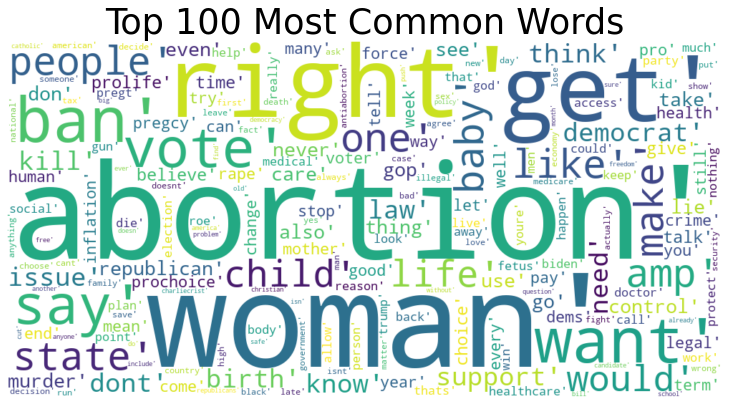

In [11]:
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
  
mostcommon = FreqDist(words).most_common(500)

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(20,6), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=35,y = 1)
plt.tight_layout(pad=2)
plt.show()

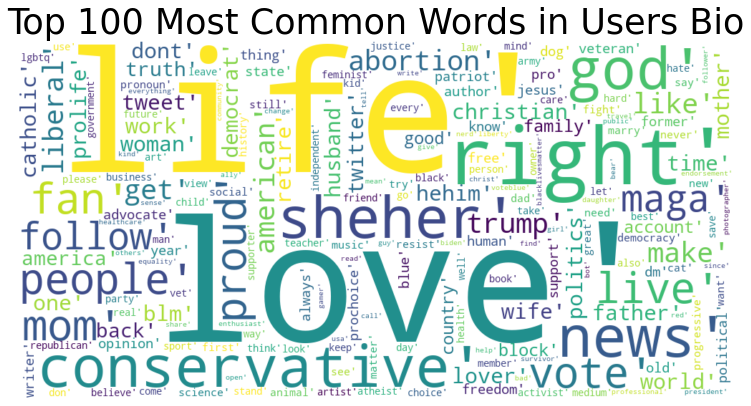

In [12]:
mostcommon = FreqDist(words_bio).most_common(500)

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(20,6), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words in Users Bio', fontsize=35,y = 1)
plt.tight_layout(pad=2)
plt.show()

In [13]:
from collections import Counter , OrderedDict
count = Counter(words_bio)
y = OrderedDict(count.most_common(20))
print(y)

OrderedDict([('love', 3007), ('life', 2189), ('right', 2108), ('conservative', 1845), ('sheher', 1582), ('news', 1524), ('god', 1509), ('people', 1481), ('fan', 1445), ('live', 1416), ('mom', 1406), ('proud', 1375), ('vote', 1363), ('follow', 1350), ('maga', 1315), ('abortion', 1298), ('like', 1283), ('make', 1280), ('get', 1215), ('american', 1197)])


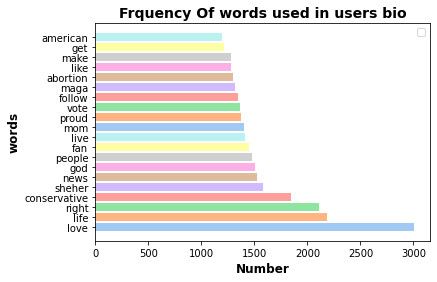

In [14]:
# fig, ax = plt.subplots(figsize=(30,30))
# fig.tight_layout(pad=5)

# # Creating a case-specific function to avoid code repetition
# def plot_hor_bar( data):
    
#     ax = sns.barplot(y='country', x='wine_servings', data=data,
#                      color='slateblue')
#     plt.title('Countries drinking wine \\nmore than average',
#               fontsize=70)
#     plt.xlabel('Servings per person', fontsize=50)
#     plt.xticks(fontsize=40)
#     plt.ylabel(None)
#     plt.yticks(fontsize=40)
#     sns.despine(left=True)
#     ax.grid(False)
#     ax.tick_params(bottom=True, left=False)
#     return None

# plot_hor_bar(wine_more_than_mean)
# plt.show()

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
   
labels = list(y.keys())
values = list(y.values())
width = .8
   
fig, ax = plt.subplots() 
colors = sns.color_palette('pastel')[0:20]
ax.barh(labels, values, width,color = colors) 
 
ax.set_xlabel('Number',fontweight="bold",fontsize = 12) 
ax.set_ylabel('words',fontweight="bold",fontsize = 12) 
ax.legend() 
   
ax.set_title('Frquency Of words used in users bio',fontweight="bold",fontsize = 14) 
   
plt.show() 

In [15]:
train_data['location'].value_counts()

United States                1330
USA                           765
Florida, USA                  320
California, USA               258
Texas, USA                    246
                             ... 
California (o/18 :-)            1
Rimini, Emilia Romagna          1
Washington, D.C. & TEXAS!       1
Zion, IL                        1
Carrollton, GA                  1
Name: location, Length: 8894, dtype: int64

In [26]:
train_data['location'] = train_data['location'].str.replace('United States','USA')
x = train_data['location'].value_counts().nlargest(13)
print(x)

USA                  2095
Florida, USA          320
California, USA       260
Texas, USA            247
Washington, DC        227
New York, USA         198
New York              196
Los Angeles, CA       193
Michigan, USA         185
Earth                 183
Chicago, IL           170
Chicago               167
Pennsylvania, USA     163
Name: location, dtype: int64


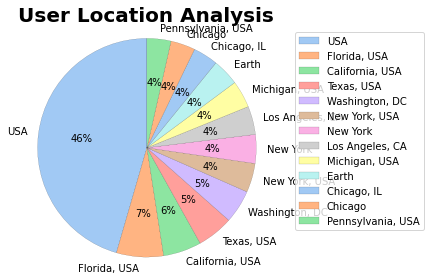

In [27]:


#define data
labels = x.keys().tolist()
data = x.tolist()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:20]

plt.title("User Location Analysis",fontweight="bold",fontsize = 20)
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',startangle = 90,  radius=1800,
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 0.1,
                      'antialiased': True})
plt.legend( bbox_to_anchor=(1.07, 1), loc='upper left')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

In [18]:
train_data['date_extracted'] = train_data['date'].str[:10]

In [19]:
train_data['date_extracted'] = pd.to_datetime(train_data['date_extracted'],format='%Y-%m-%d')

In [20]:
type(train_data['date_extracted'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
date_data = train_data['date_extracted'].value_counts()

In [22]:
date_data.sort_index(inplace=True, ascending=False) 
date_data = date_data.head(20)
date_data

2022-10-24     7926
2022-10-23    26762
2022-10-22    14644
2022-10-21        6
2022-10-20        2
2022-10-19        2
2022-10-18        6
2022-10-17        4
2022-10-16        1
2022-10-14        3
2022-10-13        3
2022-10-12        9
2022-10-11        3
2022-10-09        5
2022-10-08        2
2022-10-07        2
2022-10-06        2
2022-10-05        1
2022-10-03        2
2022-10-02        5
Name: date_extracted, dtype: int64

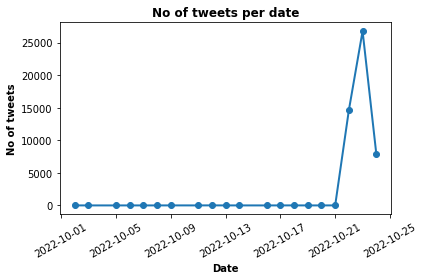

In [23]:
from datetime import datetime

plt.plot(list(date_data.index), list(date_data.values),'o-', linewidth=2)
plt.xticks(rotation=30)
plt.title("No of tweets per date",fontsize =12, fontweight="bold")
plt.xlabel("Date",fontweight="bold")
plt.ylabel("No of tweets",fontweight="bold")
plt.tight_layout()
plt.show()

In [24]:
from textblob import TextBlob

In [28]:
#create a func to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a func to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create 2 new columns
train_data['Subjectivity']=train_data['clean'].apply(getSubjectivity)
train_data['Polarity'] = train_data['clean'].apply(getPolarity)

train_data

,Unnamed: 0,Unnamed: 0.1,username,date,Bio,location,Text,source,clean,clean_bio,...,pos_tags,tokenized_bio,pos_tags_bio,wordnet_pos,wordnet_pos_bio,lemmatized,lemmatized_bio,date_extracted,Subjectivity,Polarity
0,0,0,WomensPowerCen,2016-05-03T19:27:17.000Z,Via UTube https://t.co/FLl7KHSUKO book https:/...,NaN,#cheater #Scandal #prochoice Knowledge is powe...,"<a href=""https://www.tweetsuite.com/"" rel=""nof...",cheater scandal prochoice knowledge power site...,via utube book blog aid women follow get indm,...,"[(cheater, NN), (scandal, NN), (prochoice, NN)...","[via, utube, book, blog, aid, women, follow, g...","[(via, IN), (utube, JJ), (book, NN), (blog, NN...","[(cheater, n), (scandal, n), (prochoice, n), (...","[(via, n), (utube, a), (book, n), (blog, n), (...","[cheater, scandal, prochoice, knowledge, power...","[via, utube, book, blog, aid, woman, follow, g...",2016-05-03,0.000000,0.000000
1,1,2,WomensPowerCen,2016-05-03T19:27:17.000Z,Via UTube https://t.co/FLl7KHSUKO book https:/...,NaN,#cheater #Scandal #prochoice Knowledge is powe...,"<a href=""https://www.tweetsuite.com/"" rel=""nof...",cheater scandal prochoice knowledge power site...,via utube book blog aid women follow get indm,...,"[(cheater, NN), (scandal, NN), (prochoice, NN)...","[via, utube, book, blog, aid, women, follow, g...","[(via, IN), (utube, JJ), (book, NN), (blog, NN...","[(cheater, n), (scandal, n), (prochoice, n), (...","[(via, n), (utube, a), (book, n), (blog, n), (...","[cheater, scandal, prochoice, knowledge, power...","[via, utube, book, blog, aid, woman, follow, g...",2016-05-03,0.000000,0.000000
2,2,9,Abtreibpranger,2019-07-10T20:17:59.000Z,Schwangere anprangern ist für mich Tabu;Anpran...,München,RT @ewtnDE : Der Samstag auf dem Kongress Lebe...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",ewtnde der samstag auf dem kongress lebenwürd...,schwangere anprangern ist für mich tabuanprang...,...,"[(ewtnde, JJ), (der, NN), (samstag, NN), (auf,...","[schwangere, anprangern, ist, für, mich, tabua...","[(schwangere, RB), (anprangern, JJ), (ist, NN)...","[(ewtnde, a), (der, n), (samstag, n), (auf, n)...","[(schwangere, r), (anprangern, a), (ist, n), (...","[ewtnde, der, samstag, auf, dem, kongress, leb...","[schwangere, anprangern, ist, für, mich, tabua...",2019-07-10,0.000000,0.000000
3,3,10,Abtreibpranger,2019-07-10T20:17:59.000Z,Schwangere anprangern ist für mich Tabu;Anpran...,München,RT @ewtnDE : Heute Abend um 20.00 Uhr geht es ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",ewtnde heute abend uhr geht los wir übertrage...,schwangere anprangern ist für mich tabuanprang...,...,"[(ewtnde, RB), (heute, JJ), (abend, VBP), (uhr...","[schwangere, anprangern, ist, für, mich, tabua...","[(schwangere, RB), (anprangern, JJ), (ist, NN)...","[(ewtnde, r), (heute, a), (abend, v), (uhr, a)...","[(schwangere, r), (anprangern, a), (ist, n), (...","[ewtnde, heute, abend, uhr, geht, los, wir, üb...","[schwangere, anprangern, ist, für, mich, tabua...",2019-07-10,0.000000,0.000000
4,4,11,Abtreibpranger,2019-07-10T20:17:59.000Z,Schwangere anprangern ist für mich Tabu;Anpran...,München,"RT @sakrumverum : Wäre heute nicht Sonntag, wü...","<a href=""https://mobile.twitter.com"" rel=""nofo...",sakrumverum wäre heute nicht sonntag würden d...,schwangere anprangern ist für mich tabuanprang...,...,"[(sakrumverum, NN), (wäre, WRB), (heute, NN), ...","[schwangere, anprangern, ist, für, mich, tabua...","[(schwangere, RB), (anprangern, JJ), (ist, NN)...","[(sakrumverum, n), (wäre, n), (heute, n), (nic...","[(schwangere, r), (anprangern, a), (ist, n), (...","[sakrumverum, wäre, heute, nicht, sonntag, wür...","[schwangere, anprangern, ist, für, mich, tabua...",2019-07-10,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52710,49995,49995,jroyce2017,2022-10-22 14:39:28+00:00,Humanity is the only identity I need,Earth,@reddit_lies Why do these people think that ab...,"<a href=""https://mobile.twitter.com"

In [30]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

train_data['Analysis']=train_data['Polarity'].apply(getAnalysis)
train_data['Analysis']

0         Neutral
1         Neutral
2         Neutral
3         Neutral
4         Neutral
           ...   
52710    Negative
52711     Neutral
52712    Positive
52713    Negative
52714    Negative
Name: Analysis, Length: 52715, dtype: object

In [35]:
#print all pos tweets
j=1
sortedDF = train_data.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (train_data['Analysis'][i] == 'Positive'):
    print(str(j)+')'+train_data['clean'][i])
    print()
    j=j+1

Streaming output truncated to the last 5000 lines.
19534)naehelen brokenbose person add much meaning tweet actually understand topic abortion rate poc high

19535)hey gopvoters gop theyre coming abortion rights social security medicare voting rights well please alone voting booth right thing

19536)msnbc republicans secure border criminals jail abortion birth vaccine mandates children energy independence pta parents terror watch lists strong standing world china amp russia respecting lower gas amp grocery prices amp common sense

19537)tristansnell wow getting desperate much literally murder unborn children use abortion birth control honestly super simple

19538)thephilosotroll mean tradcath politics basically opposing abortion gay rights

19539)abortion access economic issue abortionbans

19540)itsjustmeeheh scrowder yes exactly aware new restrictive abortion laws prevents women getting proper medical treatment severe pregcies complications causing even harm mother

19541)laurajedeed 

In [36]:
pos_tweets=train_data[train_data.Analysis == 'Positive']
pos_tweets=pos_tweets.sort_values(['Polarity'], ascending=False)
pos_tweets.head()

,Unnamed: 0,Unnamed: 0.1,username,date,Bio,location,Text,source,clean,clean_bio,...,tokenized_bio,pos_tags_bio,wordnet_pos,wordnet_pos_bio,lemmatized,lemmatized_bio,date_extracted,Subjectivity,Polarity,Analysis
8971,5606,5606,EarlPage13,2022-10-24 01:21:55+00:00,Republican to Democrat and haven't looked back.,The Sunshine State,"@KristiNoem But if a girl is raped, she can't ...","<a href=""http://twitter.com/download/android"" ...",kristinoem girl raped cant receive abortion wo...,republican democrat havent looked back,...,"[republican, democrat, havent, looked, back]","[(republican, JJ), (democrat, NN), (havent, NN...","[(kristinoem, n), (girl, n), (raped, v), (cant...","[(republican, a), (democrat, n), (havent, n), ...","[kristinoem, girl, rap, cant, receive, abortio...","[republican, democrat, havent, look, back]",2022-10-24,1.0,1.0,Positive
4866,1484,1484,FreyaMeansLady2,2022-10-24 04:26:38+00:00,"#Baker, #ServiceDogHandler, #atheist, 🥄, #fera...",Tellus Tertius,@Booker4KY Excellent work sir. Please give you...,"<a href=""http://twitter.com/download/iphone"" r...",excellent work sir please give mother hug abor...,baker servicedoghandler atheist feral matter s...,...,"[baker, servicedoghandler, atheist, feral, mat...","[(baker, NN), (servicedoghandler, NN), (atheis...","[(excellent, a), (work, n), (sir, n), (please,...","[(baker, n), (servicedoghandler, n), (atheist,...","[excellent, work, sir, please, give, mother, h...","[baker, servicedoghandler, atheist, feral, mat...",2022-10-24,1.0,1.0,Positive
41106,38173,38173,EricaHarley51,2022-10-22 21:41:35+00:00,NaN,NaN,@LifeNewsHQ @nancyalcorn I know alot and met a...,"<a href=""http://twitter.com/download/android"" ...",lifenewshq cyalcorn know alot met alot abortio...,,...,[],[],"[(lifenewshq, a), (cyalcorn, n), (know, v), (a...",[],"[lifenewshq, cyalcorn, know, alot, meet, alot,...",[],2022-10-22,1.0,1.0,Positive
37619,34619,34619,johnclarkson63,2022-10-23 00:22:33+00:00,NaN,NaN,@JoshShapiroPA Condoning murder (abortion) in ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",joshshapiropa condoning murder abortion passiv...,,...,[],[],"[(joshshapiropa, n), (condoning, v), (murder, ...",[],"[joshshapiropa, condone, murder, abortion, pas...",[],2022-10-23,1.0,1.0,Positive
41969,39050,39050,fishingfever06,2022-10-22 21:05:26+00:00,My kids are my life and it's been a great ride...,NaN,@mikepompeo so the church shouldn't be decided...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",mikepompeo church shouldnt decided whether wom...,kids life great ride far dem never trumper hik...,...,"[kids, life, great, ride, far, dem, never, tru...","[(kids, NNS), (life, NN), (great, JJ), (ride, ...","[(mikepompeo, n), (church, n), (shouldnt, n), ...","[(kids, n), (life, n), (great, a), (ride, n), ...","[mikepompeo, church, shouldnt, decide, whether...","[kid, life, great, ride, far, dem, never, trum...",2022-10-22,0.3,1.0,Positive


In [38]:
#print all neg tweets
j=1
sortedDF = train_data.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if (train_data['Analysis'][i] == 'Negative'):
    print(str(j)+')'+train_data['clean'][i])
    print()
    j=j+1

Streaming output truncated to the last 5000 lines.
11315)lporiginalg doesnt abortions mean less woke kids

11316)majmarauder scottamccarty seattletimes forced anyone abortion legal use abortion birth control rip babies apart trimester failed aboritons people grow defects result failed aboriton

11317)scoontvnetwork brand politics going resonate people fence usually tad bit smarter ardent demsrepubs especially thinks abortions help lower inflation improve economy

11318)kenschoenleber lie tiffany said abortion womans choice senators plan eliminate social security thats stupid fear tactic keep people noticing huge increase crime economy going toilet businesses leaving cause taxes

11319)don want abortion don get one liberals allude moralintellectual vacancy talking like pathetic

11320)zengreaser lawrencetwestfa simcockiain holysmoke say nothing roe wade pelosi coming fact host worst people cardinal zen allow german bishops flemish bishops promote heresies never correct pro abortion nomi

In [39]:
neg_tweets=train_data[train_data.Analysis == 'Negative']
neg_tweets=neg_tweets.sort_values(['Polarity'], ascending=False)
neg_tweets.head()

,Unnamed: 0,Unnamed: 0.1,username,date,Bio,location,Text,source,clean,clean_bio,...,tokenized_bio,pos_tags_bio,wordnet_pos,wordnet_pos_bio,lemmatized,lemmatized_bio,date_extracted,Subjectivity,Polarity,Analysis
52705,49990,49990,VickiesTweets,2022-10-22 14:39:41+00:00,NaN,NaN,@miwomenchildren If young women are old enough...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",miwomenchildren young women old enough forced ...,,...,[],[],"[(miwomenchildren, n), (young, a), (women, n),...",[],"[miwomenchildren, young, woman, old, enough, f...",[],2022-10-22,0.333333,-4.625929e-18,Negative
23529,20240,20240,prochoiceforal1,2022-10-23 16:13:44+00:00,unapologetically Prochoice~✨ prolife feminism ...,NaN,@ChaoticMomo715 Shields? No these are real lif...,"<a href=""http://twitter.com/download/android"" ...",shields real life people situations forced bir...,unapologetically prochoice✨ prolife feminism i...,...,"[unapologetically, prochoice✨, prolife, femini...","[(unapologetically, RB), (prochoice✨, JJ), (pr...","[(shields, n), (real, a), (life, n), (people, ...","[(unapologetically, r), (prochoice✨, a), (prol...","[shield, real, life, people, situation, force,...","[unapologetically, prochoice✨, prolife, femini...",2022-10-23,0.225000,-6.938894e-18,Negative
23526,20237,20237,prochoiceforal1,2022-10-23 16:13:46+00:00,unapologetically Prochoice~✨ prolife feminism ...,NaN,Shields? No these are real life people and sit...,"<a href=""http://twitter.com/download/android"" ...",shields real life people situations forced bir...,unapologetically prochoice✨ prolife feminism i...,...,"[unapologetically, prochoice✨, prolife, femini...","[(unapologetically, RB), (prochoice✨, JJ), (pr...","[(shields, n), (real, a), (life, n), (people, ...","[(unapologetically, r), (prochoice✨, a), (prol...","[shield, real, life, people, situation, force,...","[unapologetically, prochoice✨, prolife, femini...",2022-10-23,0.225000,-6.938894e-18,Negative
20388,17073,17073,nf660066,2022-10-23 18:13:26+00:00,NaN,NaN,@cjwarnke @HouseMajPAC @VoteAprilBecker This i...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",cjwarnke housemajpac voteaprilbecker trueno on...,,...,[],[],"[(cjwarnke, n), (housemajpac, n), (voteaprilbe...",[],"[cjwarnke, housemajpac, voteaprilbecker, truen...",[],2022-10-23,0.466667,-9.251859e-18,Negative
11924,8571,8571,RESgrignoli,2022-10-23 23:36:19+00:00,sgrignoli.net for BIO,"Mechanicsburg, PA","Although I am against abortion, people like th...","<a href=""https://mobile.twitter.com"" rel=""nofo...",although abortion people like kinda convincing...,sgrignolinet bio,...,"[sgrignolinet, bio]","[(sgrignolinet, NN), (bio, NN)]","[(although, n), (abortion, n), (people, n), (l...","[(sgrignolinet, n), (bio, n)]","[although, abortion, people, like, kinda, conv...","[sgrignolinet, bio]",2022-10-23,0.833333,-9.251859e-18,Negative


In [44]:
neutral_tweets=train_data[train_data.Analysis == 'Neutral']
neutral_tweets=neutral_tweets.sort_values(['Polarity'], ascending=False)
neutral_tweets.head()

,Unnamed: 0,Unnamed: 0.1,username,date,Bio,location,Text,source,clean,clean_bio,...,tokenized_bio,pos_tags_bio,wordnet_pos,wordnet_pos_bio,lemmatized,lemmatized_bio,date_extracted,Subjectivity,Polarity,Analysis
0,0,0,WomensPowerCen,2016-05-03T19:27:17.000Z,Via UTube https://t.co/FLl7KHSUKO book https:/...,NaN,#cheater #Scandal #prochoice Knowledge is powe...,"<a href=""https://www.tweetsuite.com/"" rel=""nof...",cheater scandal prochoice knowledge power site...,via utube book blog aid women follow get indm,...,"[via, utube, book, blog, aid, women, follow, g...","[(via, IN), (utube, JJ), (book, NN), (blog, NN...","[(cheater, n), (scandal, n), (prochoice, n), (...","[(via, n), (utube, a), (book, n), (blog, n), (...","[cheater, scandal, prochoice, knowledge, power...","[via, utube, book, blog, aid, woman, follow, g...",2016-05-03,0.000000,0.0,Neutral
34735,31684,31684,jenn_summers01,2022-10-23 02:43:46+00:00,"The world is 🌎, covid & climate change are rea...",Treaty 6,"@tammyrobert Heartbreaking. Like abortions, we...","<a href=""http://twitter.com/download/iphone"" r...",tammyrobert heartbreaking like abortions follo...,world covid climate change real mom passionate...,...,"[world, covid, climate, change, real, mom, pas...","[(world, NN), (covid, NN), (climate, NN), (cha...","[(tammyrobert, a), (heartbreaking, v), (like, ...","[(world, n), (covid, n), (climate, n), (change...","[tammyrobert, heartbreaking, like, abortion, f...","[world, covid, climate, change, real, mom, pas...",2022-10-23,0.000000,0.0,Neutral
34738,31687,31687,AIHaiku1,2022-10-23 02:43:42+00:00,I am a computer program\nI exist to make Haiku's,NaN,theirs insomnia \nexasperation journey\ncan dr...,"<a href=""https://cheapbotsdonequick.com"" rel=""...",insomnia exasperation journey dream abortion,computer program exist make haikus,...,"[computer, program, exist, make, haikus]","[(computer, NN), (program, NN), (exist, VBP), ...","[(insomnia, a), (exasperation, n), (journey, n...","[(computer, n), (program, n), (exist, v), (mak...","[insomnia, exasperation, journey, dream, abort...","[computer, program, exist, make, haiku]",2022-10-23,0.000000,0.0,Neutral
34740,31689,31689,2020hindsight8,2022-10-23 02:43:34+00:00,"I stand with Democrat Party, what I say is tru...",NaN,Do you remember when you joined Twitter? I do!...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",remember joined twitter mytwitteranniversary v...,stand democrat party say true based support bl...,...,"[stand, democrat, party, say, true, based, sup...","[(stand, NN), (democrat, VBZ), (party, NN), (s...","[(remember, n), (joined, v), (twitter, r), (my...","[(stand, n), (democrat, v), (party, n), (say, ...","[remember, join, twitter, mytwitteranniversary...","[stand, democrat, party, say, true, base, supp...",2022-10-23,0.000000,0.0,Neutral
34741,31690,31690,IllinoisPolls,2022-10-23 02:43:34+00:00,Moderate\nFind solutions that move IL & the US...,Southern Illinois,"@ProgNewDealer In Illinois, most of the Dem ad...","<a href=""https://mobile.twitter.com"" rel=""nofo...",prognewdealer illinois dem ads done last years...,moderate find solutions move usa forward party...,...,"[moderate, find, solutions, move, usa, forward...","[(moderate, JJ), (find, NN), (solutions, NNS),...","[(prognewdealer, n), (illinois, n), (dem, n), ...","[(moderate, a), (find, n), (solutions, n), (mo...","[prognewdealer, illinois, dem, ad, do, last, y...","[moderate, find, solution, move, usa, forward,...",2022-10-23,0.095833,0.0,Neutral


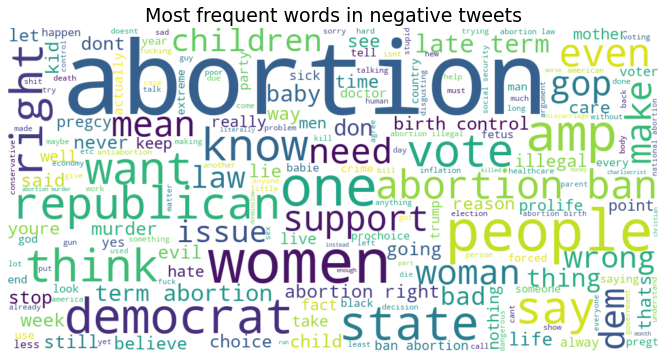

In [55]:
#Plot word clouds
allWords = ' '.join( [twts for twts in neg_tweets['clean']])
plt.figure(figsize=(20,6), facecolor='None')
wordCloud = WordCloud(width=1000, height=500, background_color='white').generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

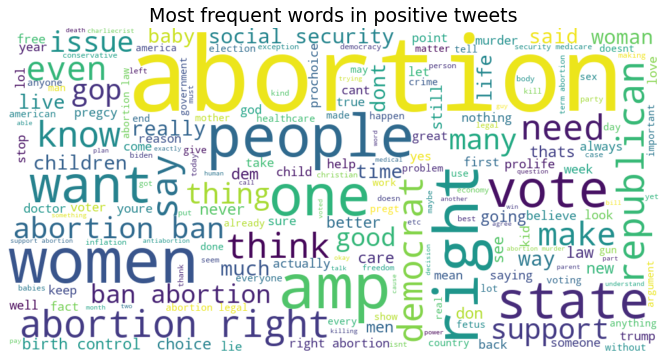

In [56]:
#Plot word clouds
allWords = ' '.join( [twts for twts in pos_tweets['clean']])
plt.figure(figsize=(20,6), facecolor='None')
wordCloud = WordCloud(width=1000, height=500, background_color='white').generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

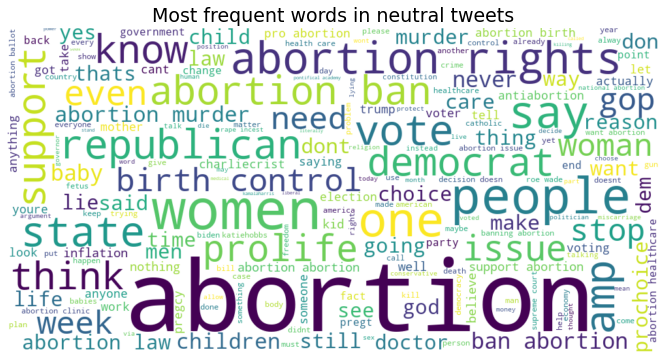

In [57]:
#Plot word clouds
allWords = ' '.join( [twts for twts in neutral_tweets['clean']])
plt.figure(figsize=(20,6), facecolor='None')
wordCloud = WordCloud(width=1000, height=500, background_color='white').generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

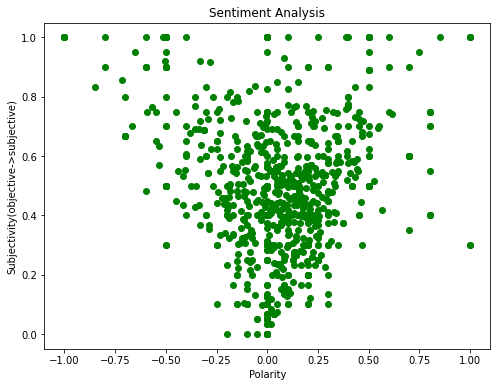

In [53]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,train_data.shape[0],25):
  plt.scatter(train_data['Polarity'][i], train_data['Subjectivity'][i], color='Green')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity(objective->subjective)')
plt.show()

In [48]:
#get percentage of positive tweets
ptweets = train_data[train_data.Analysis == 'Positive']
ptweets = ptweets['clean']

round( (ptweets.shape[0]/train_data.shape[0] *100),1)

41.8

In [49]:
#get percentage of neg tweets
ptweets = train_data[train_data.Analysis == 'Negative']
ptweets = ptweets['clean']

round( (ptweets.shape[0]/train_data.shape[0] *100),1)

26.2

In [50]:
train_data['Analysis'].value_counts()

Positive    22033
Neutral     16868
Negative    13814
Name: Analysis, dtype: int64

Text(0.5, 1.0, 'Distribution of Sentiments')

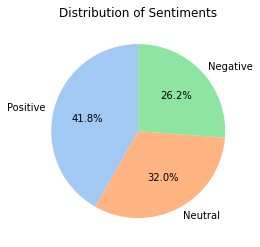

In [51]:

colors = sns.color_palette('pastel')[0:20]

tags=train_data['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',colors = colors, startangle=90, label='')
plt.title('Distribution of Sentiments') 